In [3]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from IPython.display import display
from seaborn import heatmap
from time import time
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

In [5]:
df.shape

(4898, 12)

In [6]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [7]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
n_wines = df.shape[0]
print(n_wines)

quality_wines = df[df['quality'] > 6].shape[0]
print(quality_wines)

mid_wines = df[(df['quality'] <= 6) & (df['quality'] >= 5)].shape[0]
print(mid_wines)

poor_wines = df[df['quality'] < 5].shape[0]
print(poor_wines)

quality_wines_in_percent = quality_wines * 100 / n_wines
print(quality_wines_in_percent)

df.describe()

4898
1060
3655
183
21.641486320947326


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

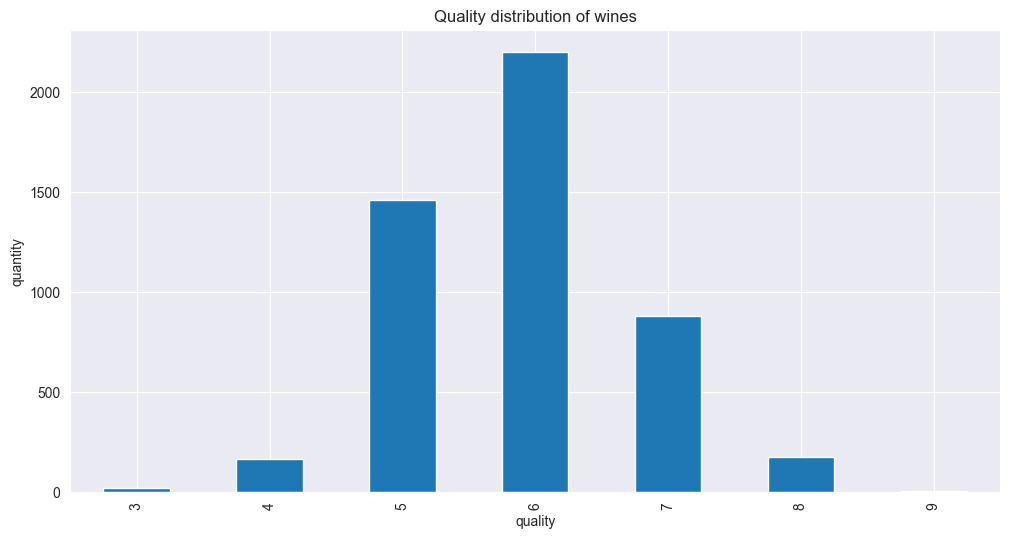

C:\Users\yusuf\AppData\Local\Temp\ipykernel_8480\3831079695.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'])


<Axes: xlabel='quality', ylabel='Density'>

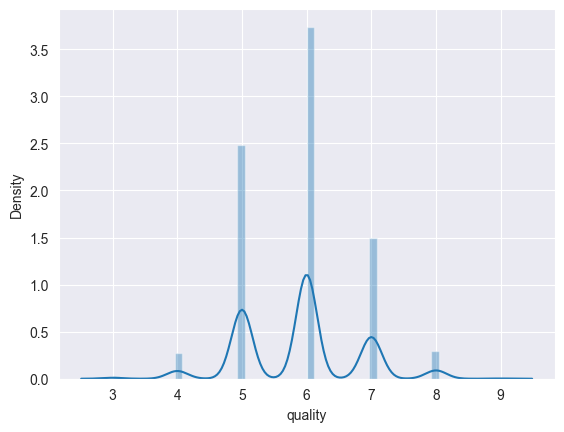

In [10]:
distribution = df['quality'].value_counts().sort_index()
plt.figure(figsize=(12,6))
distribution.plot(kind='bar')
plt.title("Quality distribution of wines")
plt.xlabel("quality")
plt.ylabel("quantity")
plt.show()
sns.distplot(df['quality'])

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

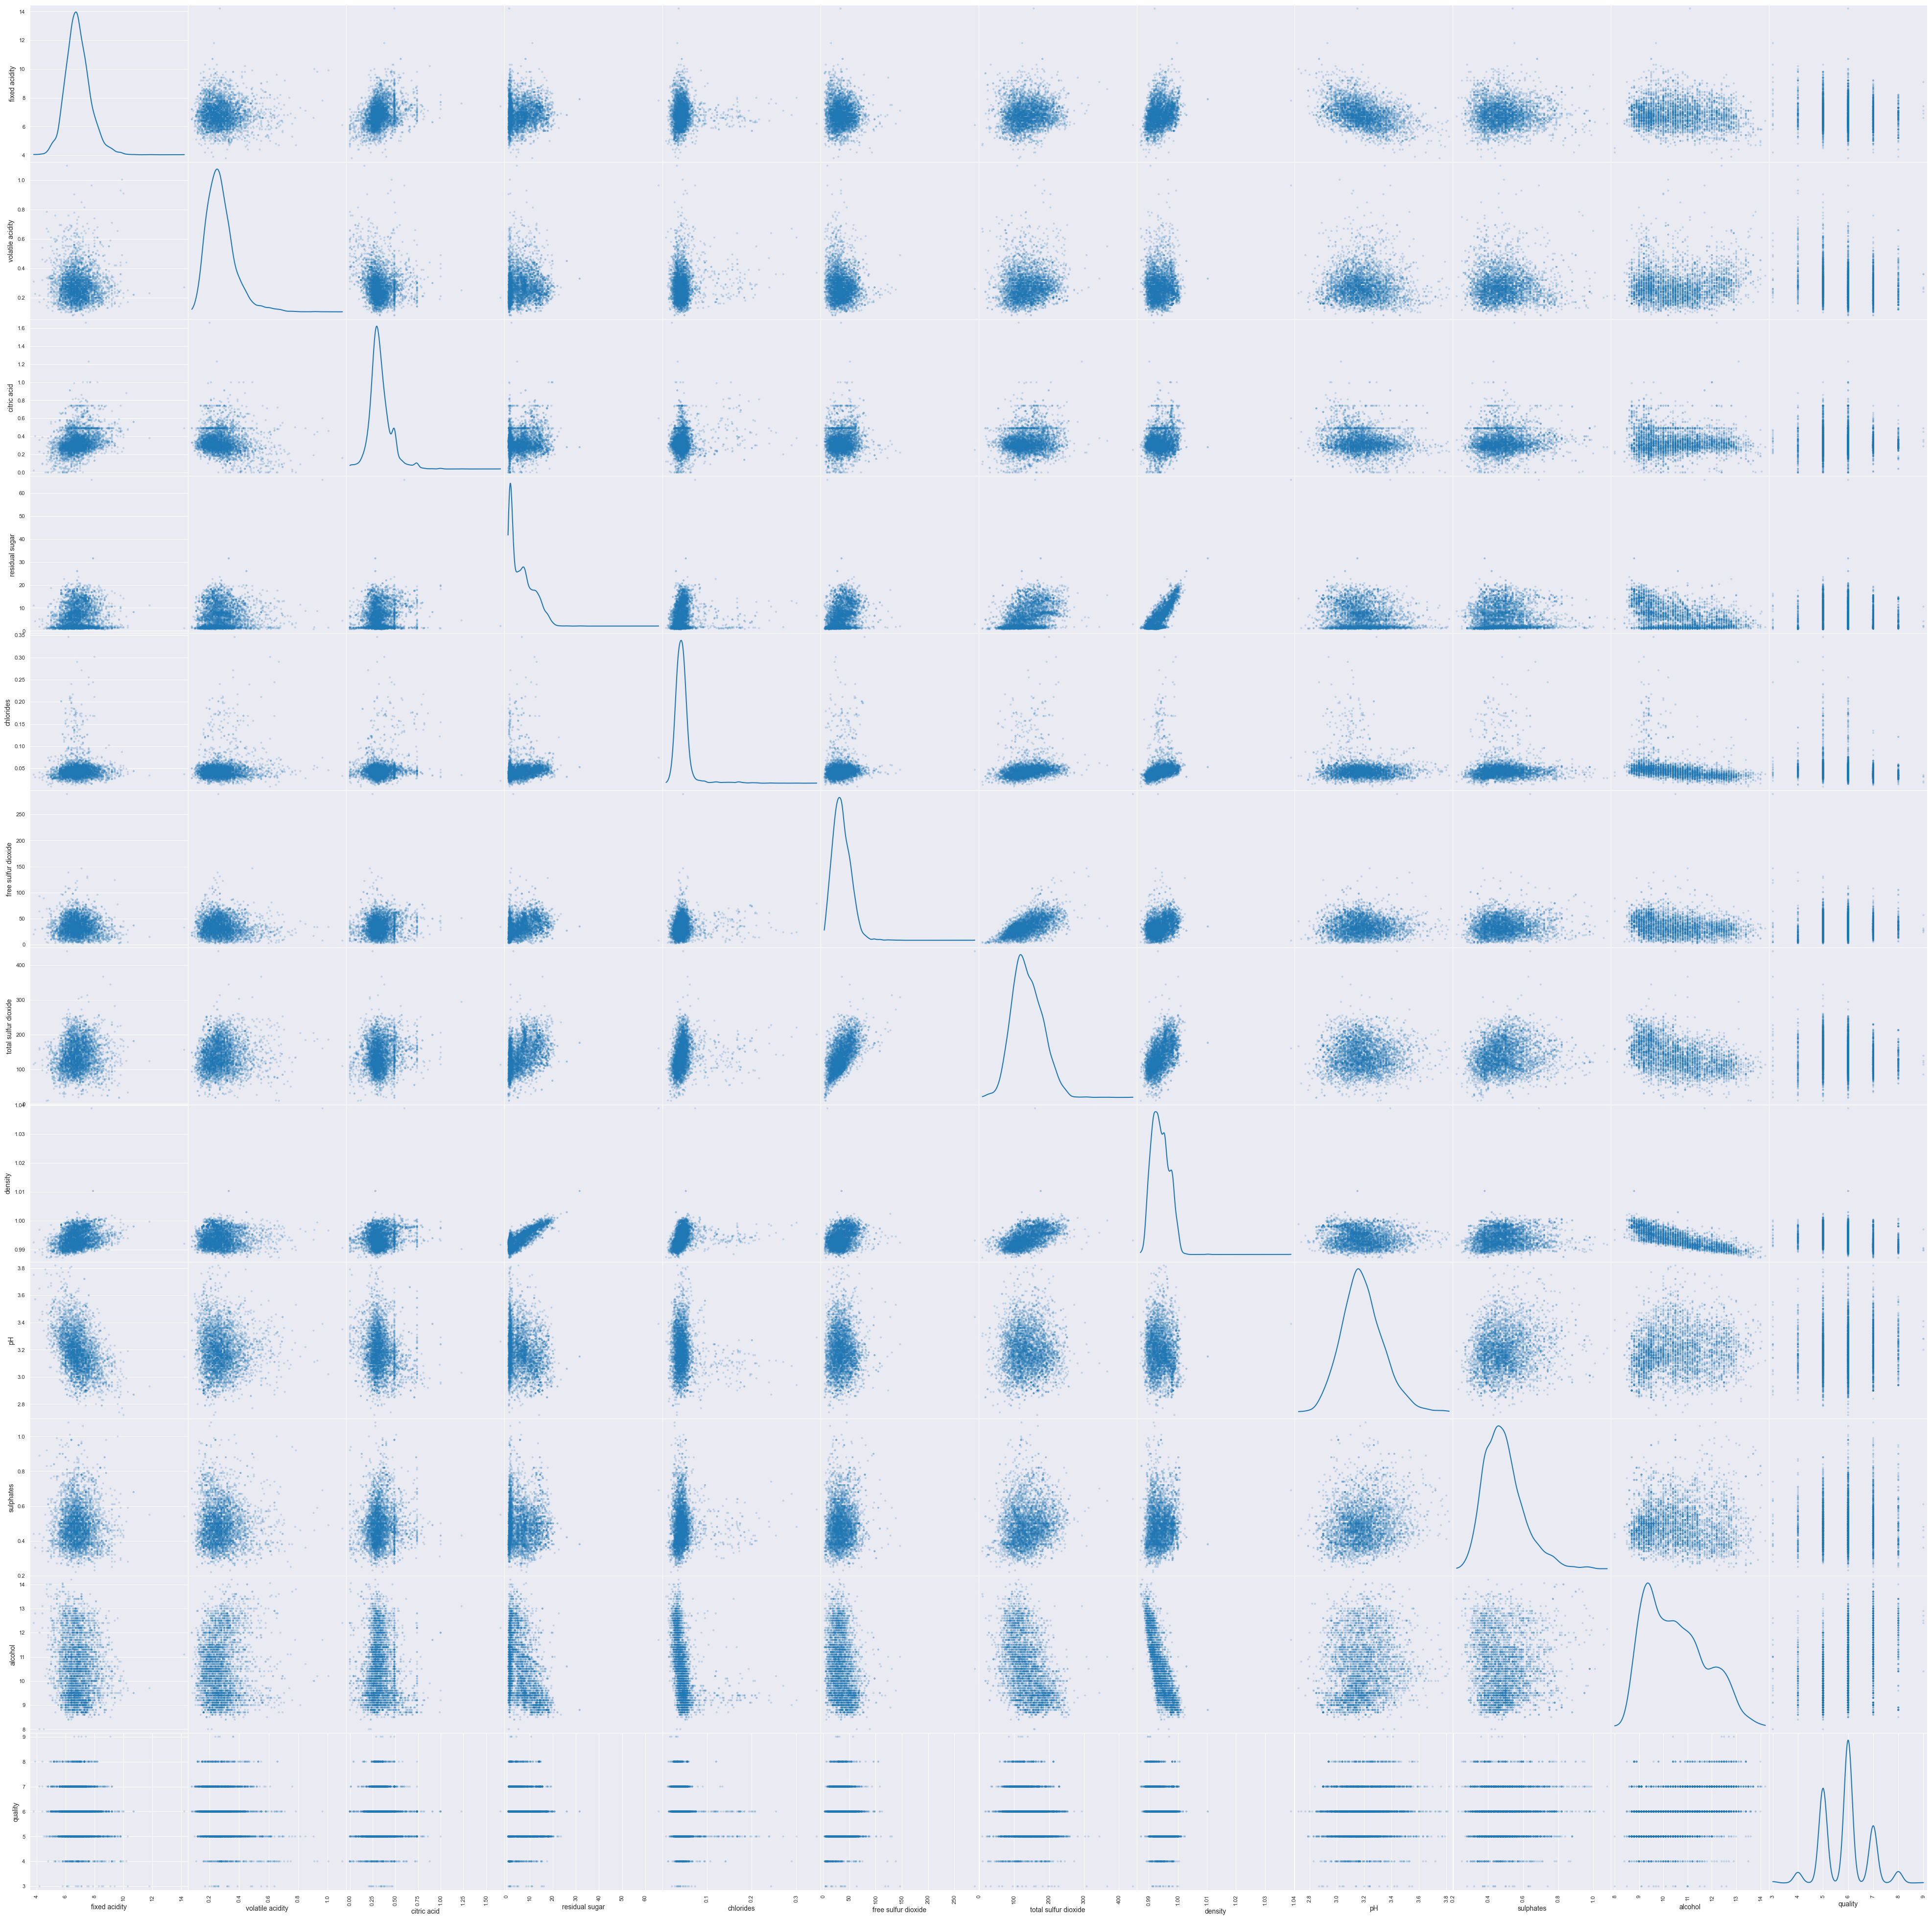

In [11]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(50,50), diagonal='kde')

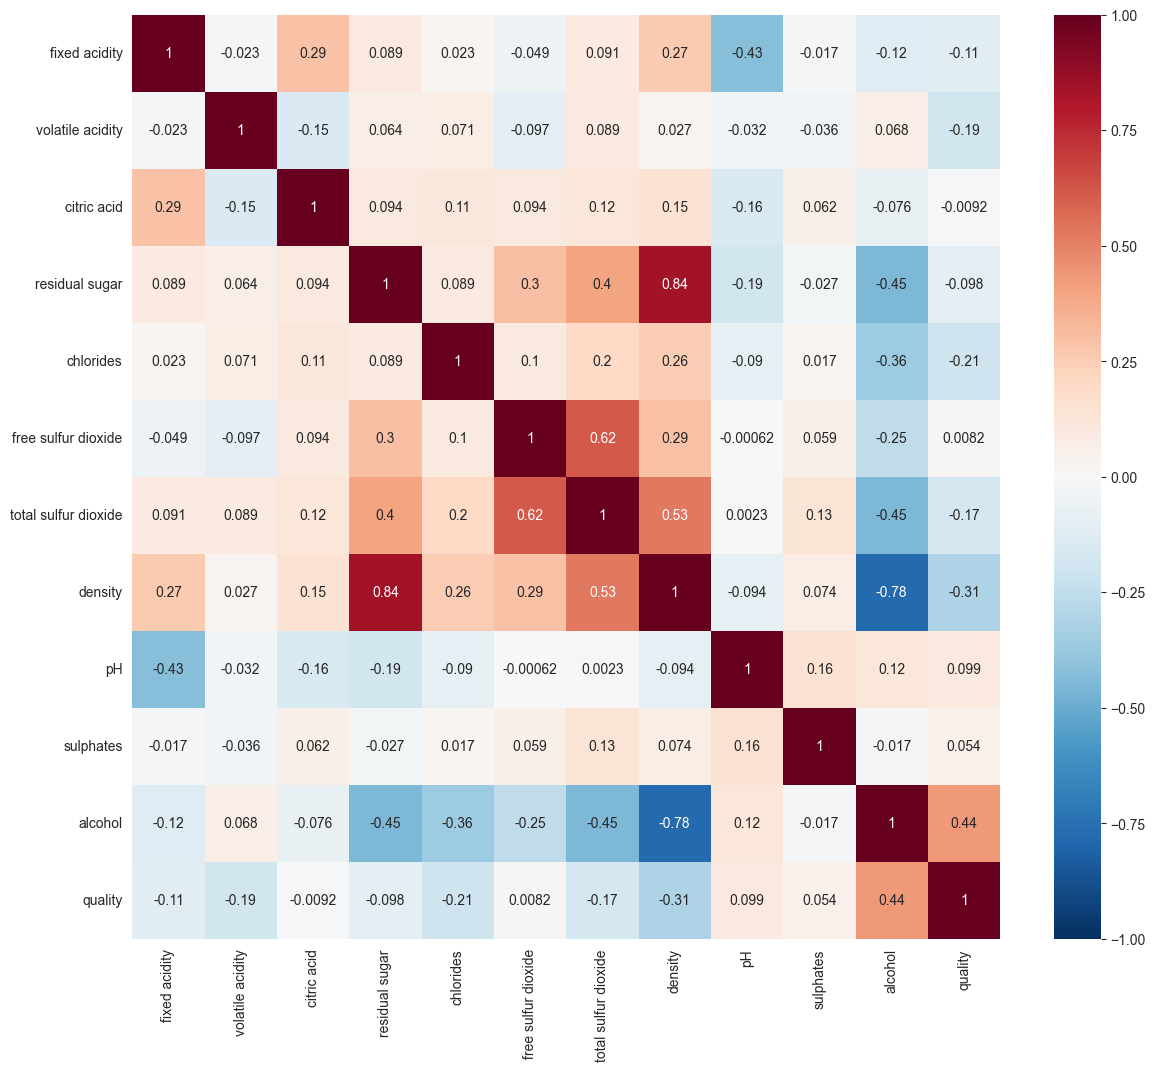

In [12]:
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap='RdBu_r')

C:\Users\yusuf\OneDrive\Desktop\Wine-Taste-prediction\Lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
C:\Users\yusuf\OneDrive\Desktop\Wine-Taste-prediction\Lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

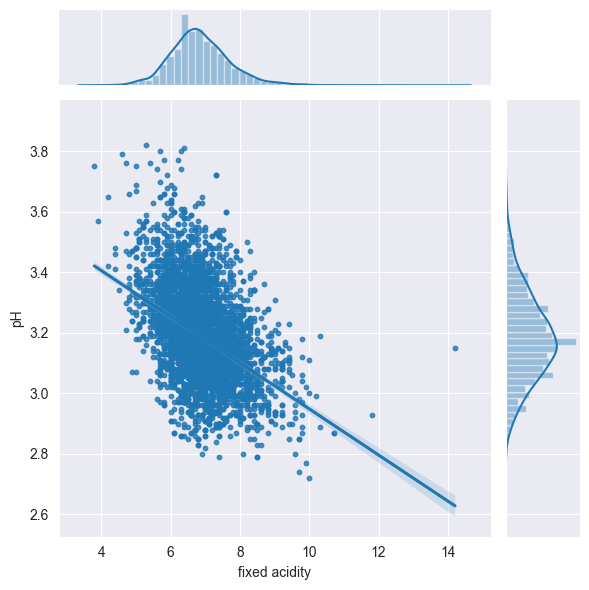

In [13]:
pH_fixedAcidity = df[['fixed acidity', 'pH']]
gridA = sns.JointGrid(x='fixed acidity', y='pH', data=pH_fixedAcidity)
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s":10})
gridA = gridA.plot_marginals(sns.distplot)

C:\Users\yusuf\OneDrive\Desktop\Wine-Taste-prediction\Lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
C:\Users\yusuf\OneDrive\Desktop\Wine-Taste-prediction\Lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

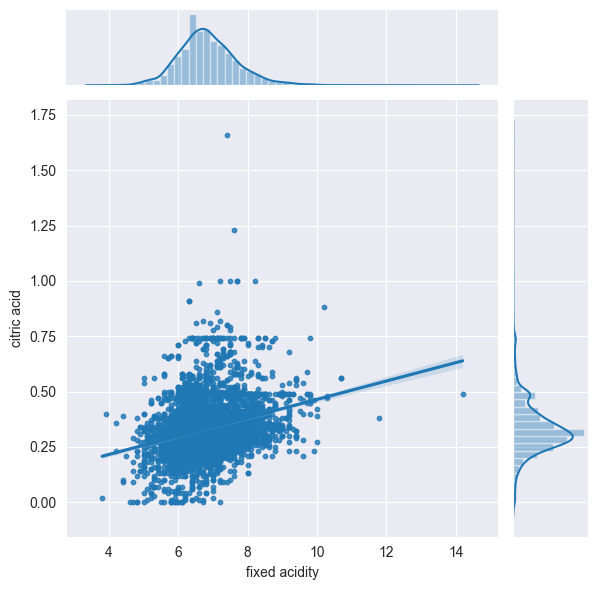

In [14]:
fixedAcidity_citricAcidity = df[['fixed acidity', 'citric acid']]
gridB = sns.JointGrid(x='fixed acidity', y='citric acid', data=fixedAcidity_citricAcidity)
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s":10})
gridB = gridB.plot_marginals(sns.distplot)

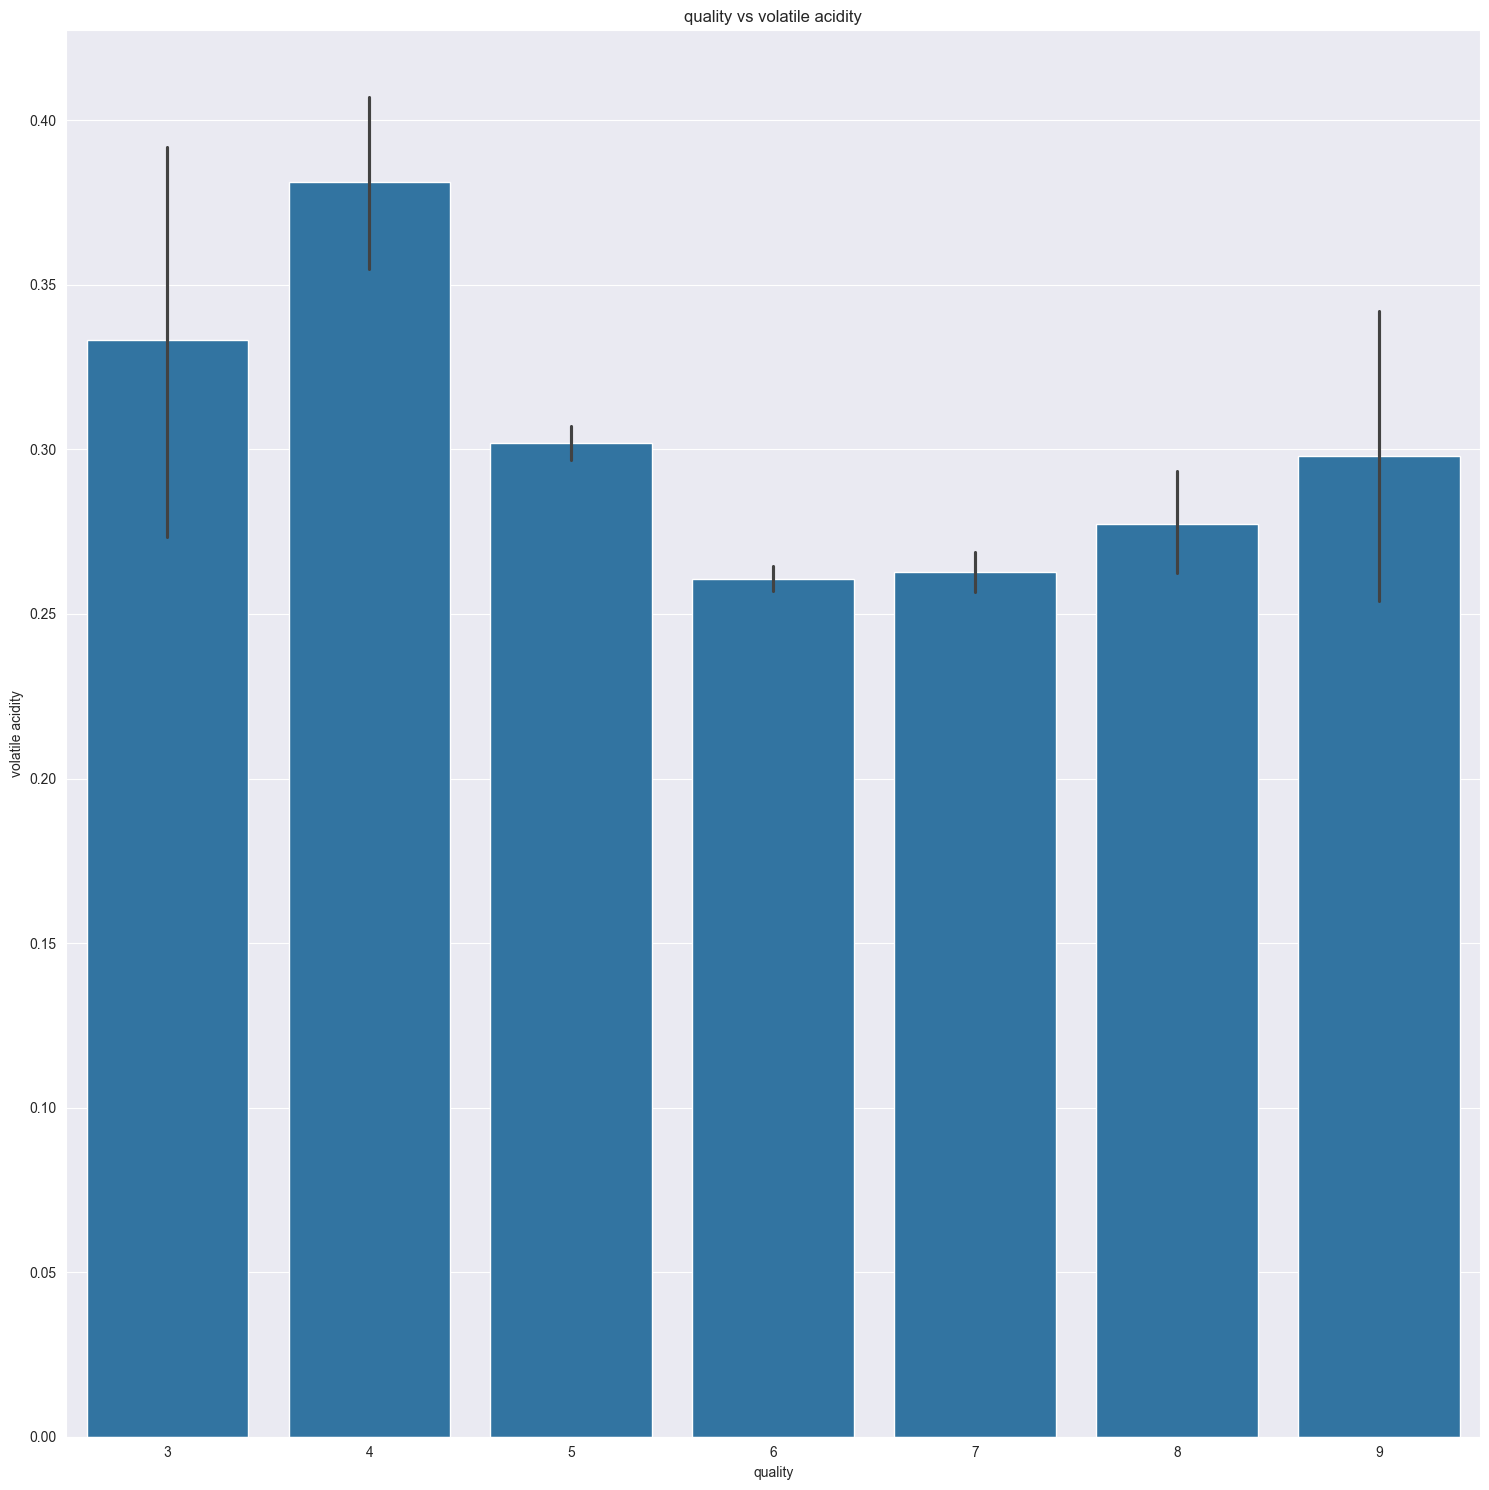

<Figure size 640x480 with 0 Axes>

In [15]:
volatileAcidity_quality = df[['volatile acidity', 'quality']]
fig, axs = plt.subplots(ncols=1, figsize=(15,15))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality vs volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

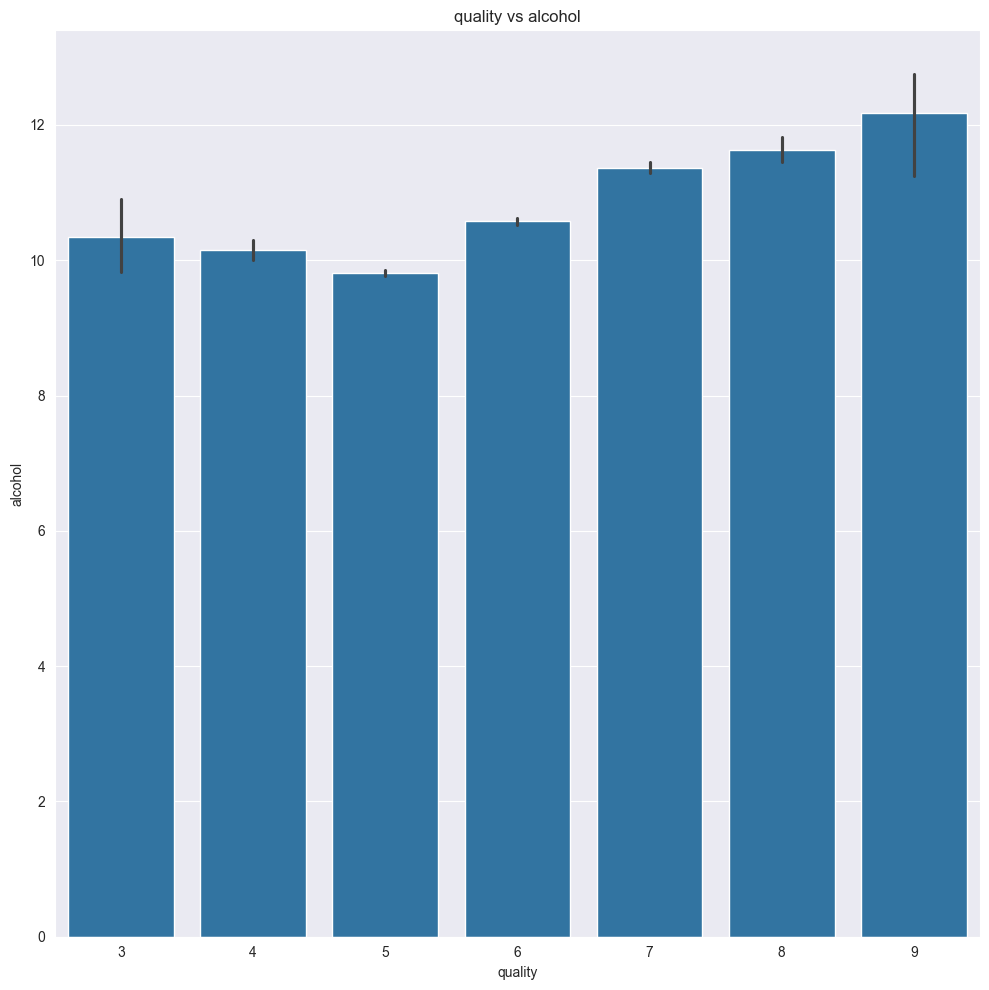

<Figure size 640x480 with 0 Axes>

In [16]:
alcohol_quality = df[['alcohol', 'quality']]
fig, axs = plt.subplots(ncols=1, figsize=(10,10))
sns.barplot(x='quality', y='alcohol', data=alcohol_quality, ax=axs)
plt.title('quality vs alcohol')
plt.tight_layout()
plt.show()
plt.gcf().clear()

Data outlier detection and cleaning data from it
For some reason it all the data falls under the range of outlier and I would not filter the outliers in this one (maybe it will change).


PART 2: Model selection and Training

In [17]:
bins = [1,4,6,10]

quality_labels = [0,1,2]

df['quality categorical'] = pd.cut(df['quality'], bins=bins, labels=quality_labels, include_lowest=True)

print(df.head(2))

y = df['quality categorical']
X = df.drop(['quality', 'quality categorical'], axis=1)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality quality categorical  
0      8.8        6                   1  
1      9.5        6                   1  


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Size of the train data: {X_train.shape[0]}")
print(f"Size of the test data: {X_test.shape[0]}")

Size of the train data: 3918
Size of the test data: 980


In [30]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_and_evaluate(model, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    
    start = time()
    model = model.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    results['train time'] = end - start
    
    start = time()
    prediction_train = model.predict(X_train[:300])
    prediction_test = model.predict(X_test)
    end = time()
    
    results['prediction time'] = end - start
    
    results['acc train'] = accuracy_score(y_train[:300], prediction_train)
    
    results['acc test'] = accuracy_score(y_test, prediction_test)
    
    results['fbeta train'] = fbeta_score(y_train[:300], prediction_train, beta=0.5, average='micro')
    
    results['fbeta test'] = fbeta_score(y_test, prediction_test, beta=0.5, average='micro')
    print(f"{model.__class__.__name__} on {sample_size} samples")
    print(results)
    return results

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

mf_a = GaussianNB()
mf_b = DecisionTreeClassifier(max_depth=None, random_state=None)
mf_c = RandomForestClassifier(max_depth=None, random_state=None)

samples100 = len(y_train)
samples10 = int(len(y_train) * 10/100)
samples1 = int(len(y_train) * 1/100)
results = {}
for mf in [mf_a, mf_b, mf_c]:
    mf_name = mf.__class__.__name__
    results[mf_name] = {}
    for i, sample in enumerate([samples1,samples10,samples100]):
        results[mf_name][i] = \
        train_and_evaluate(mf, sample, X_train, y_train, X_test, y_test)

GaussianNB on 39 samples
{'train time': 0.0030012130737304688, 'prediction time': 0.0029990673065185547, 'acc train': 0.6, 'acc test': 0.6142857142857143, 'fbeta train': 0.6, 'fbeta test': 0.6142857142857143}
GaussianNB on 391 samples
{'train time': 0.003000020980834961, 'prediction time': 0.0030045509338378906, 'acc train': 0.6766666666666666, 'acc test': 0.6704081632653062, 'fbeta train': 0.6766666666666666, 'fbeta test': 0.6704081632653062}
GaussianNB on 3918 samples
{'train time': 0.0045130252838134766, 'prediction time': 0.0029969215393066406, 'acc train': 0.6166666666666667, 'acc test': 0.6642857142857143, 'fbeta train': 0.6166666666666667, 'fbeta test': 0.6642857142857143}
DecisionTreeClassifier on 39 samples
{'train time': 0.003000974655151367, 'prediction time': 0.003998994827270508, 'acc train': 0.7333333333333333, 'acc test': 0.6877551020408164, 'fbeta train': 0.7333333333333333, 'fbeta test': 0.6877551020408164}
DecisionTreeClassifier on 391 samples
{'train time': 0.0049991

For the white wine random forest classifier seems the best option again

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[0.07219479 0.0889937  0.07661281 0.08696648 0.08602852 0.09590124
 0.0863722  0.11594101 0.08528584 0.07363097 0.13207245]


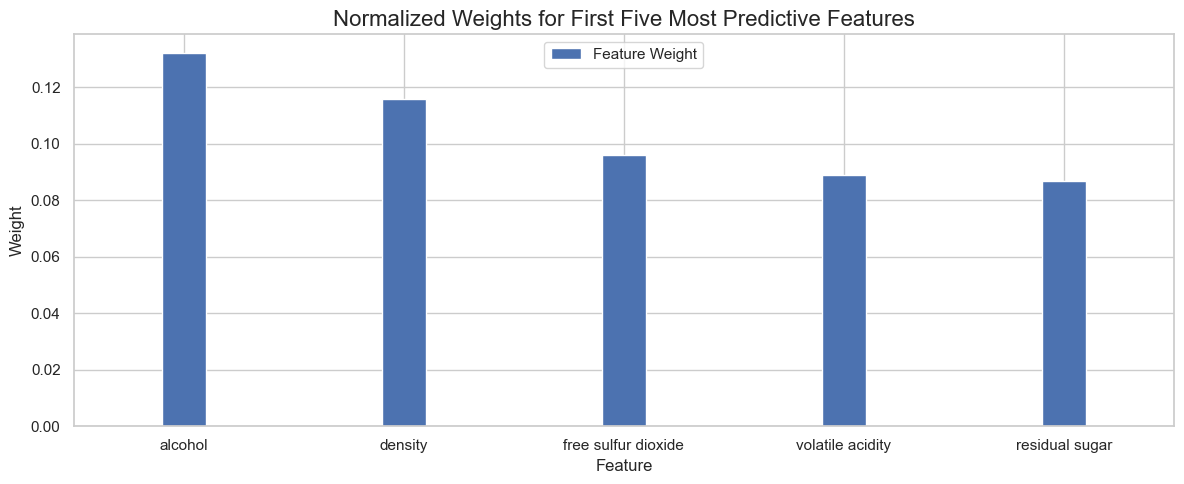

In [33]:
model = RandomForestClassifier(max_depth=None, random_state=None)

model = model.fit(X_train, y_train)

important_features = model.feature_importances_

print(X_train.columns)
print(important_features)

vs.feature_plot(important_features, X_train, y_train)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

classifier = RandomForestClassifier(max_depth=None, random_state=None)

parameters = {'n_estimators':[10,20,30,40], 'max_features':[3,4,5,None], 'max_depth':[5,6,7,None]}

scorer = make_scorer(fbeta_score, beta=0.5, average='micro')

grid_Obj = GridSearchCV(classifier, parameters, scoring=scorer)

grid_fit = grid_Obj.fit(X_train, y_train)

best_classifier = grid_fit.best_estimator_

predictions = (classifier.fit(X_train, y_train)).predict(X_test)

best_predictions = best_classifier.predict(X_test)

print("Unoptimized model\n-----")
print(f"accuracy score of testing data {accuracy_score(y_test, predictions)}")
print(f"F-score of testing data {fbeta_score(y_test, predictions, beta=0.5, average='micro')}")
print("Optimized model\n-----")
print(best_classifier)
print(f"Final accuracy score on the testing data: {accuracy_score(y_test, best_predictions)}")
print(f"F-score of testing data {fbeta_score(y_test, best_predictions, beta=0.5, average='micro')}")

Unoptimized model
-----
accuracy score of testing data 0.8683673469387755
F-score of testing data 0.8683673469387755
Optimized model
-----
RandomForestClassifier(max_features=4, n_estimators=40)
Final accuracy score on the testing data: 0.8622448979591837
F-score of testing data 0.8622448979591837


In [35]:
wine_data = [[8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9.5],
            [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 1 ],
            [7.4, 2, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 0.6]]

for i, quality in enumerate(best_classifier.predict(wine_data)):
    print(f"Predicted quality for Wine {i+1} is: {quality}")

Predicted quality for Wine 1 is: 1
Predicted quality for Wine 2 is: 2
Predicted quality for Wine 3 is: 0


C:\Users\yusuf\OneDrive\Desktop\Wine-Taste-prediction\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
